In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [148]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [149]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Eksplorasi Data Analyst

Handling Missing Value

In [151]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

cek apakah ada outlier 

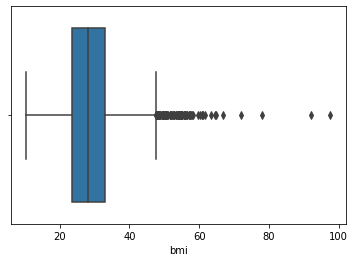

In [152]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'bmi')
plt.show() 

karena pada column terdapat outlier lebih baik kita mengisinya dengan median tetapi apakah menggunakan median juga cocok? mari kita liat

<AxesSubplot:xlabel='bmi', ylabel='Count'>

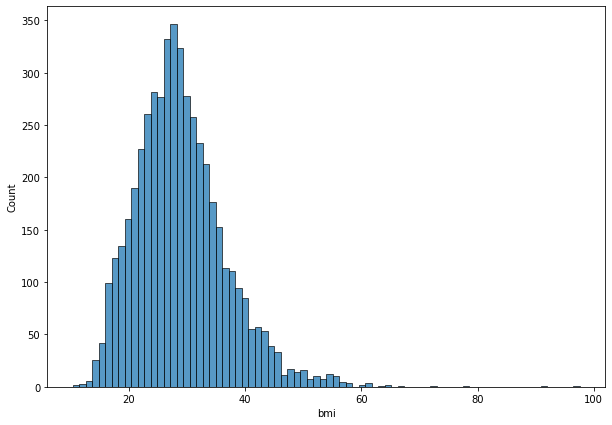

In [153]:
plt.figure(figsize=(10,7))
sns.histplot(data = df, x = 'bmi')

In [154]:
df_update = df.copy()
df_update['bmi'] = df_update['bmi'].fillna(df_update['bmi'].median())

<AxesSubplot:xlabel='bmi', ylabel='Count'>

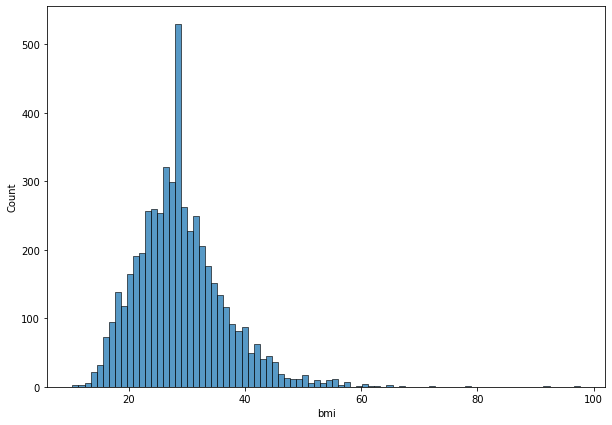

In [155]:
plt.figure(figsize=(10,7))
sns.histplot(data = df_update, x = 'bmi')

Ternyata distribusi nya tidak baik dengan menggunakan median ini

Kita gunakan metode yang selanjutnya yaitu Regression-Based Imputation

In [156]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [157]:
from sklearn.linear_model import LinearRegression
### Membuat sebuah LinearRegression
lr = LinearRegression()

### Seleksi kolom-kolom yang digunakan
selected_cols = ['bmi', 'heart_disease', 'age', 'stroke', 'hypertension']

### Bagi menjadi Missing dan Training. Missing Df berisi baris-baris dengan 'Age' kosong.
missing_df = df[df['bmi'].isnull()==True][selected_cols]
training_df = df[df['bmi'].isnull()==False][selected_cols]

### Buatlah model regression dari baris-baris yang tidak memiliki missing values
y_train = training_df['bmi']
x_train = training_df.drop('bmi', axis = 1)

lr.fit(x_train, y_train)

### Prediksilah nilai 'Age' pada baris-baris yang memiliki missing values
x_missing = missing_df.drop('bmi', axis = 1)

prediction = lr.predict(x_missing)
missing_df['bmi'] = prediction

In [158]:
### Combine all into one dataframe
df_full = pd.concat([training_df, missing_df])
df_full = df_full.sort_index()
df_full

,bmi,heart_disease,age,stroke,hypertension
0,36.600000,1,67.0,1,0
1,29.343429,0,61.0,1,0
2,32.500000,1,80.0,1,0
3,34.400000,0,49.0,1,0
4,24.000000,0,79.0,1,1
...,...,...,...,...,...
5105,35.508639,0,80.0,0,1
5106,40.000000,0,81.0,0,0
5107,30.600000,0,35.0,0,0
5108,25.600000,0,51.0,0,0


In [159]:
df[selected_cols] = df_full[selected_cols]

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:xlabel='bmi', ylabel='Count'>

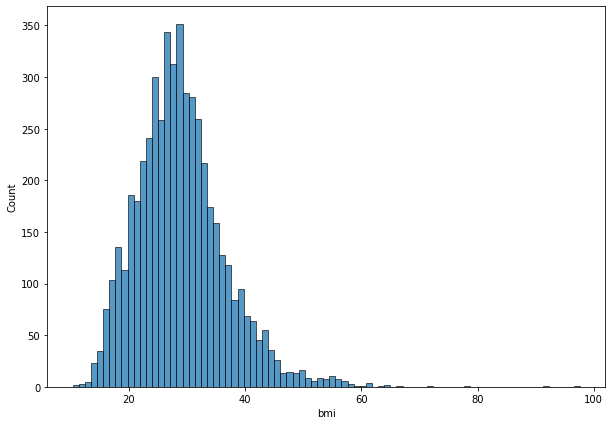

In [161]:
plt.figure(figsize=(10,7))
sns.histplot(data = df, x = 'bmi')

sudah lumayan cocok yah dengan menggunakan metode tersebut

In [162]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.343429,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [163]:
def age_classifier(x):
    if x < 11.0:
        return 'Kid'
    elif x < 21.0:
        return 'Teen'
    elif x < 31.0:
        return 'Young Adult'
    elif x < 51.0:
        return 'Adult'
    else:
        return 'Old'

In [164]:
df['ageclass'] = np.vectorize(age_classifier)(df['age'])

In [165]:
def bmi_classifier(x):
    if x<18.5:
        return 'UnderWeight'
    elif x<22.5:
        return 'Normal'
    elif x<29.5:
        return 'OverWeight'
    else:
        return 'Obese'

In [166]:
df['bmi_class'] = np.vectorize(bmi_classifier)(df['bmi'])

In [167]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ageclass,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.343429,never smoked,1,Old,OverWeight


In [168]:
import plotly.express as px
fig = px.pie(df, names='stroke',)
fig.update_layout(title='Persentase dari Stroke')
fig.show()

proposi antara terkena stroke dan yang tidak terkena stroke tidak stabil

In [169]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [170]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['stroke']==0)] 
df_minority = df[(df['stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4750, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_new = df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [171]:
import plotly.express as px
fig = px.pie(df_new, names='stroke',)
fig.update_layout(title='Persentase dari Stroke')
fig.show()

In [172]:
fig = px.histogram(df_new, x="age", marginal="box")
fig.update_layout(title='Distribution of Age')
fig.show()

Distribusi dari data lumayan stabil

In [173]:
colors =['pink', 'lightblue']
fig = px.histogram(df_new, x="age", color="stroke", marginal="box", histnorm='probability density', color_discrete_map={0:'#2a9d8f',1:'#e9c46a'})
fig.show()

Orang yang terkena stroke banyak dialami oleh umur 80an

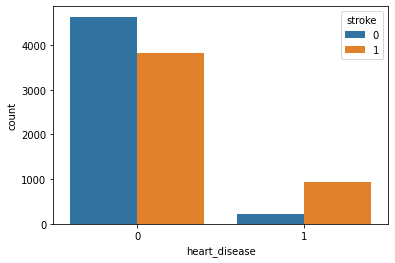

In [174]:
fig = plt.figure()  
ax = sns.countplot(data = df_new, x='heart_disease', hue = 'stroke')
plt.show() 

Ternyata yang mengalami sakit jantung, tidak terlalu banyak juga yang terkena stroke

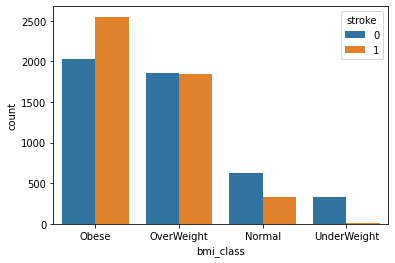

In [175]:
fig = plt.figure()  
ax = sns.countplot(data = df_new, x='bmi_class', hue = 'stroke')
plt.show() 

In [176]:
colors =['pink', 'lightblue']
fig = px.histogram(df_new, x="bmi", color="stroke", marginal="box", histnorm='probability density', color_discrete_map={0:'#2a9d8f',1:'#e9c46a'})
fig.show()

> One Hot Encoding

In [177]:
df_new.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
ageclass              object
bmi_class             object
dtype: object

In [178]:
df_new['gender'].value_counts()

Female    5561
Male      4049
Other        1
Name: gender, dtype: int64

In [179]:
df_new['gender'] = df_new['gender'].replace(['Male','Female', 'Other'],[1,0,2])

In [180]:
df_new['ever_married'].value_counts()

Yes    7316
No     2295
Name: ever_married, dtype: int64

In [181]:
df_new['ever_married'] = df_new['ever_married'].replace(['Yes','No'],[1,0])

In [182]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9611 entries, 102 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9611 non-null   int64  
 1   gender             9611 non-null   int64  
 2   age                9611 non-null   float64
 3   hypertension       9611 non-null   int64  
 4   heart_disease      9611 non-null   int64  
 5   ever_married       9611 non-null   int64  
 6   work_type          9611 non-null   object 
 7   Residence_type     9611 non-null   object 
 8   avg_glucose_level  9611 non-null   float64
 9   bmi                9611 non-null   float64
 10  smoking_status     9611 non-null   object 
 11  stroke             9611 non-null   int64  
 12  ageclass           9611 non-null   object 
 13  bmi_class          9611 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.4+ MB


In [183]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df_new['work_type']= label_encoder.fit_transform(df_new['work_type'])
df_new['Residence_type']= label_encoder.fit_transform(df_new['Residence_type'])
df_new['smoking_status']= label_encoder.fit_transform(df_new['smoking_status'])
  
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ageclass,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.343429,never smoked,1,Old,OverWeight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Old,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adult,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Old,OverWeight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,35.508639,never smoked,0,Old,Obese
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Old,Obese
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Adult,Obese
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Old,OverWeight


In [184]:
df_new.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
ageclass              object
bmi_class             object
dtype: object

In [185]:
df_new.drop(columns=['id','ageclass', 'bmi_class'], inplace = True)

In [186]:
df_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
102,0,74.0,0,0,1,2,0,231.61,34.600000,1,1
179,1,81.0,0,0,1,2,1,213.22,26.100000,0,1
92,0,57.0,0,0,0,3,1,68.02,37.500000,2,1
14,0,79.0,0,1,1,2,1,214.09,28.200000,2,1
106,0,50.0,1,0,1,2,0,73.18,30.300000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,35.508639,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [187]:
X = df_new.loc[:, df_new.columns != 'stroke']
y = df_new["stroke"]

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

### Modeling Logreg

In [189]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Modeling Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [191]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [192]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [193]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [194]:
grid_search.best_score_

0.9342720756602029

In [195]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [196]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

>Confusion matriks

### Evaluation

cek apakah model mana kah yang baik digunakan

In [197]:
from sklearn.metrics import accuracy_score
print("Accurracy with LR :", accuracy_score(y_test, y_lr))
print("Accurracy with RF :", accuracy_score(y_test, y_rf))

Accurracy with LR : 0.776332899869961
Accurracy with RF : 0.9505851755526658


In [198]:
from sklearn.metrics import precision_score
print("Precision with LR :", precision_score(y_test, y_lr, average='macro'))
print("Precision with RF :", precision_score(y_test, y_rf, average='macro'))

Precision with LR : 0.7777508189590725
Precision with RF : 0.9549121974371144


In [199]:
from sklearn.metrics import recall_score
print("Recall score with LR :", recall_score(y_test, y_lr, average='macro'))
print("Recall score with RF :", recall_score(y_test, y_rf, average='macro'))

Recall score with LR : 0.7764337484875443
Recall score with RF : 0.9507261410788381


In [200]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_rf))

[[1429  499]
 [ 361 1556]]
[[1738  190]
 [   0 1917]]


In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print("=======================================================")
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1928
           1       0.76      0.81      0.78      1917

    accuracy                           0.78      3845
   macro avg       0.78      0.78      0.78      3845
weighted avg       0.78      0.78      0.78      3845

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1928
           1       0.91      1.00      0.95      1917

    accuracy                           0.95      3845
   macro avg       0.95      0.95      0.95      3845
weighted avg       0.96      0.95      0.95      3845



In [202]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7764337484875443
0.9507261410788382


> Diliat dari data evaluation modeling yang cocok kita gunakan adalah Random forest lebih baik dipandingkan logistic regression. Dengan nilai perbandingan antara nilai evaluasi presisi, acuracy, recall store. 